In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import cv2

In [2]:
image = cv2.imread("chewbacca.jpg")

In [3]:
type(image)

numpy.ndarray

In [4]:
image.shape

(383, 681, 3)

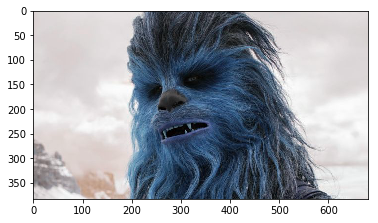

In [5]:
plt.imshow(image)

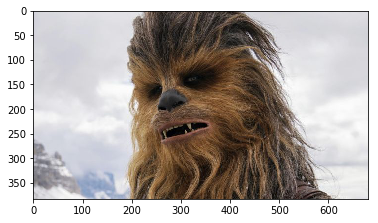

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

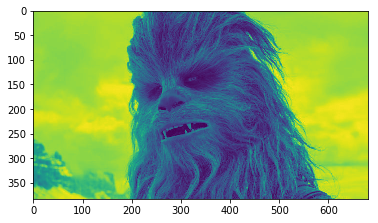

In [7]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

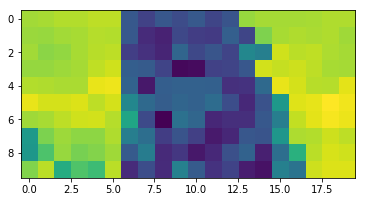

In [8]:
resized = cv2.resize(image, (20,10))

plt.imshow(resized)

In [9]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

In [10]:
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex
print(rgb2hex([255,10,0]))

#ff0a00


In [11]:
def plot_image_info(path, k=6):
    #load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # resize to speedup
    resized_image_rgb = cv2.resize(img_rgb, (64,64), interpolation= cv2.INTER_AREA)
    
    #reshape to list of pixels
    img_list = resized_image_rgb.reshape((resized_image_rgb.shape[0] * resized_image_rgb.shape[1], 3))
    
    # cluster the pixels and assign labels
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(img_list)
    
    # count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())
    
    #subset out most popular centroids
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]
    
    #plots
    
    plt.figure(figsize= (14,8))
    plt.subplot(221)
    plt.imshow(img_rgb)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(label_counts.values(), labels= color_labels, colors= ordered_colors, startangle= 90)
    plt.show()
    

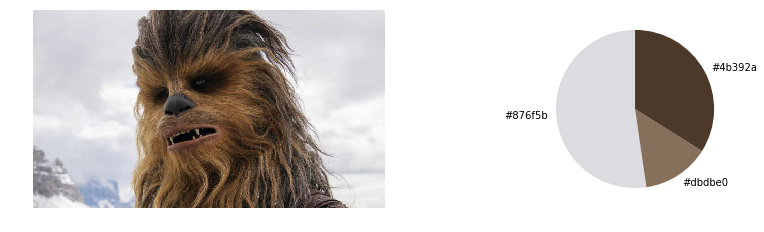

In [12]:
plot_image_info("chewbacca.jpg", 3)

In [13]:
### CAMERA MANIPULATION ###

In [14]:
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500
RAN_FRAMES = []

while(True):
    #read a new frame
    _, frame = CAMERA.read()
    
    #flip the frame
    frame = cv2.flip(frame, 1)
    
    #rescaling camera output
    aspect = frame.shape[1]/ float(frame.shape[0])
    res = int(aspect* HEIGHT)# landscape orientation
    frame = cv2.resize(frame, (res, HEIGHT))
    
    #add rectangle
    cv2.rectangle(frame, (300,75), (650,425), (0,255,0), 2)
    
    # show the frame
    cv2.imshow("Capturing frame", frame)
    
    key = cv2.waitKey(1)
    
    #quit camera if 'q' is pressed
    if key & 0xFF == ord("q"):
        CAMERA.release()
        cv2.destroyAllWindows()
        break
    elif key & 0xFF == ord("s"):
        #save the frame
        RAN_FRAMES.append(frame)
        
        #preview the frame
        plt.imshow(frame)
        plt.show()

CAMERA.release()
cv2.destroyAllWindows()

In [15]:
for frames in RAN_FRAMES:
    plt.imshow(frames)
    plt.show()